## 1. Explore The Data: What Data Are We Using?

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class (1st, 2nd, or 3rd)
- **Sex** (str) - Gender of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

### Read In Data

In [2]:
# Read in the data from the data folder
titanic = pd.read_csv(r'C:\Users\hancu\OneDrive - Nokia\Trainings TBD\Applied Machine Learning Feature Engineering\Ex_Files_Applied_ML\Exercise Files\data\titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check the number of rows and columns in the data
titanic.shape

(891, 12)

In [4]:
# Check the type of data stored in each column
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# See the distribution of our target variable
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
# Drop all categorical features
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']
titanic.drop(cat_feat, axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### Explore Continuous Features

In [7]:
# Look at the general distribution of these features
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Look at the correlation matrix
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
# Look at fare by different passenger class levels
titanic.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [10]:
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(titanic.groupby('Survived')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    survived = titanic[titanic['Survived']==1][feature]
    not_survived = titanic[titanic['Survived']==0][feature]
    tstat, pval = stats.ttest_ind(survived, not_survived, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [11]:
# Look at the distribution of each feature at each level of the target variable
for feature in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    describe_cont_feature(feature)


*** Results for Pclass ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
t-statistic: -10.3, p-value: 2.91e-23
None

*** Results for Age ***
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
t-statistic: nan, p-value: nan
None

*** Results for SibSp ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
t-statistic: -1.2, p-value: 0.233
None

*** Results for Parch ***
          count

In [12]:
# Look at the average value of each feature based on whether Age is missing
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [13]:
titanic = pd.read_csv(r'C:\Users\hancu\OneDrive - Nokia\Trainings TBD\Applied Machine Learning Feature Engineering\Ex_Files_Applied_ML\Exercise Files\data\titanic.csv',
                     usecols=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### Plot Continuous Features

C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


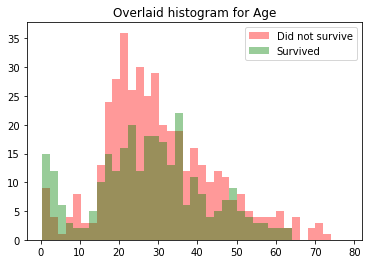

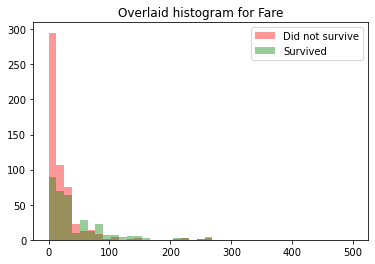

In [14]:
# Plot overlaid histograms for continuous features
for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

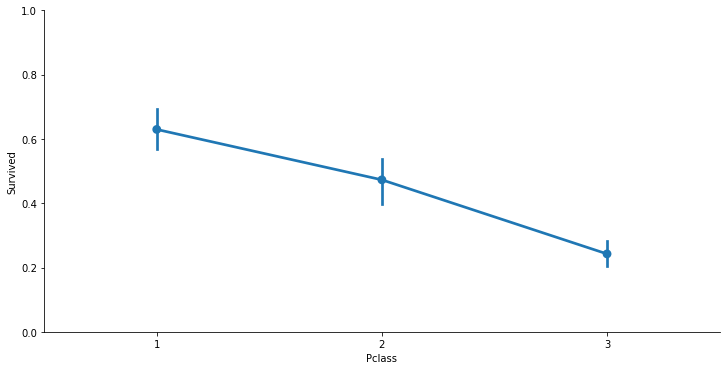

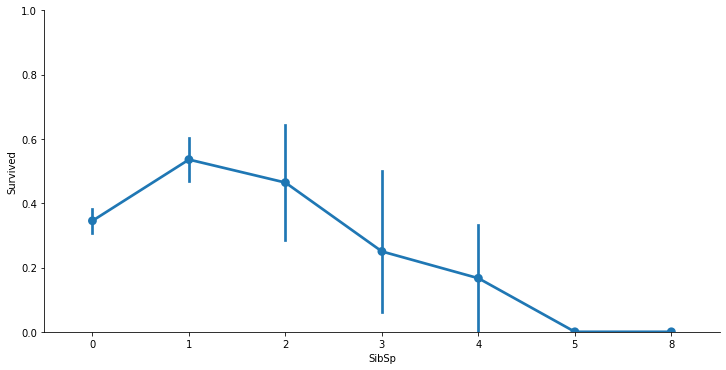

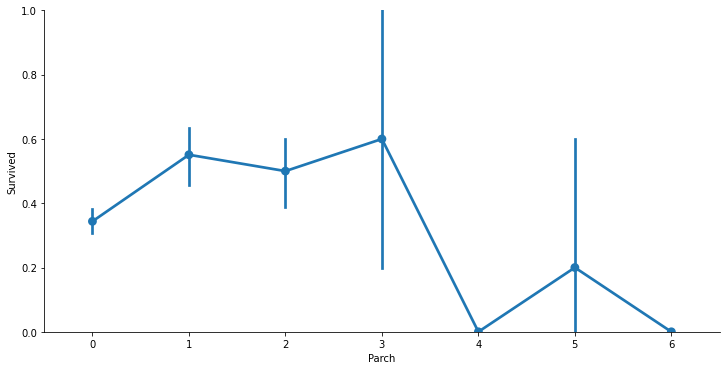

In [15]:
# Generate categorical plots for ordinal features
for col in ['Pclass', 'SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )
    plt.ylim(0, 1)

(0.0, 1.0)

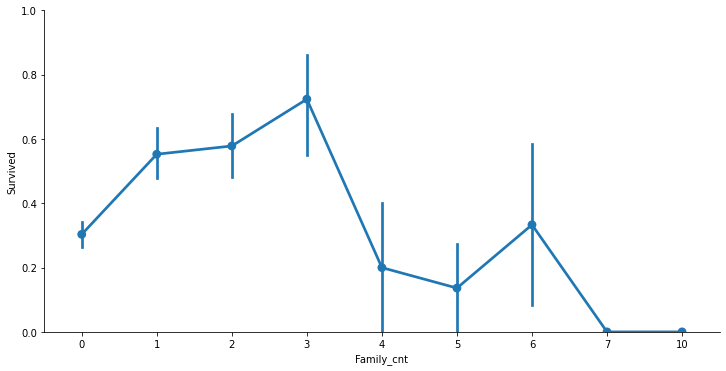

In [16]:
# Create a new family count feature
titanic['Family_cnt'] = titanic['SibSp']+titanic['Parch']
sns.catplot(x='Family_cnt', y='Survived', data=titanic, kind='point', aspect=2, )
plt.ylim(0, 1)

### Explore Categorical Features

In [17]:
titanic = pd.read_csv(r'C:\Users\hancu\OneDrive - Nokia\Trainings TBD\Applied Machine Learning Feature Engineering\Ex_Files_Applied_ML\Exercise Files\data\titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# Drop all continuous features
cont_feat = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
titanic.drop(cont_feat, axis=1, inplace=True)
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S


In [19]:
# Check if there are any missing values
titanic.isnull().sum()

Survived      0
Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [20]:
# Explore the number of unique values for each feature
for col in titanic.columns:
    print('{}: {} unique values'.format(col, titanic[col].nunique()))

Survived: 2 unique values
Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 147 unique values
Embarked: 3 unique values


In [21]:
# Check survival rate by gender
titanic.groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [22]:
# Check survival rate by the port depared from
titanic.groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [23]:
# Is Cabin missing at random?
titanic.groupby(titanic['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


In [24]:
# Look at unique values for the Ticket feature
titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [25]:
# Create a title feature by parsing passenger name
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked,Title
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C,Mrs
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs
4,0,"Allen, Mr. William Henry",male,373450,NaN,S,Mr


In [26]:
# Look at survival rate by title
print(titanic.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean']))

                       count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000


## Plot Categorical Features

In [27]:
titanic = pd.read_csv('../../../data/titanic.csv',
                      usecols=['Survived', 'Name', 'Sex', 'Cabin', 'Embarked'])
titanic.head()

,Survived,Name,Sex,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,C85,C
2,1,"Heikkinen, Miss. Laina",female,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,C123,S
4,0,"Allen, Mr. William Henry",male,NaN,S


In [28]:
# Create a title feature by parsing passenger name and create a cabin indicator variable
titanic['Title_Raw'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic['Title'] = titanic['Title_Raw'].apply(lambda x: x if x in ['Master', 'Miss', 'Mr', 'Mrs'] else 'Other')
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,Survived,Name,Sex,Cabin,Embarked,Title_Raw,Title,Cabin_ind
0,0,"Braund, Mr. Owen Harris",male,NaN,S,Mr,Mr,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,C85,C,Mrs,Mrs,1
2,1,"Heikkinen, Miss. Laina",female,NaN,S,Miss,Miss,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,C123,S,Mrs,Mrs,1
4,0,"Allen, Mr. William Henry",male,NaN,S,Mr,Mr,0


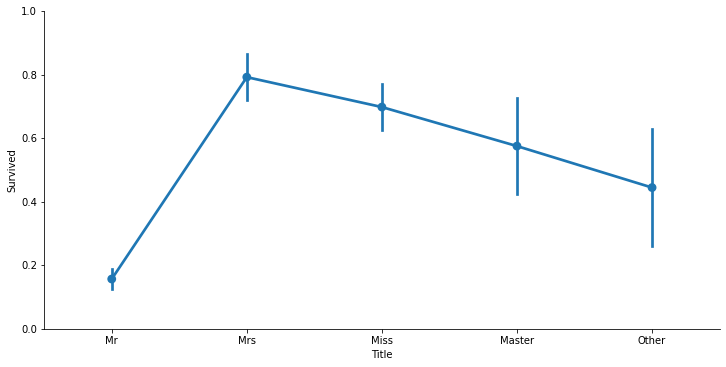

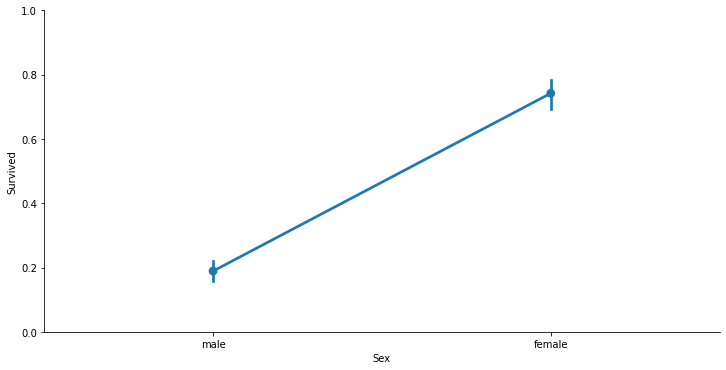

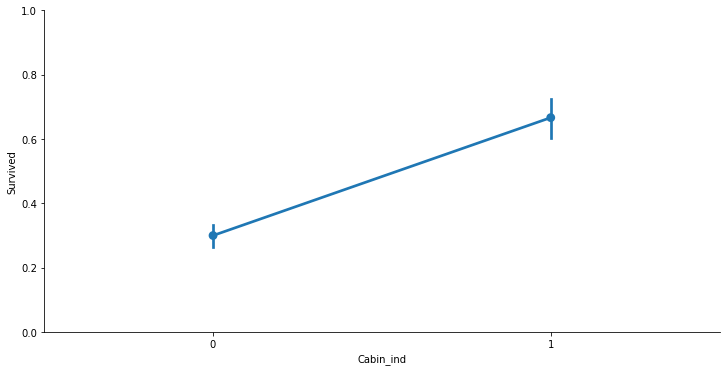

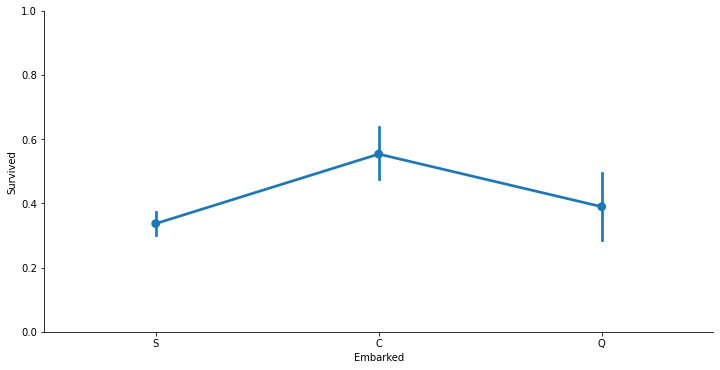

In [29]:
# Generate categorical plots for features
for col in ['Title', 'Sex', 'Cabin_ind', 'Embarked']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )
    plt.ylim(0, 1)

In [30]:
# Split embarked by whether the passenger had a cabin
titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


In [31]:
for col in titanic.columns:
   print('{}: {} unique values'.format(col, titanic[col].nunique()))

Survived: 2 unique values
Name: 891 unique values
Sex: 2 unique values
Cabin: 147 unique values
Embarked: 3 unique values
Title_Raw: 17 unique values
Title: 5 unique values
Cabin_ind: 2 unique values


## 2. Creating And Cleaning Features: Treat Missing Values In The Data

Three primary methods to treat missing values:
1. Impute to the median or mean of the feature
2. Model that feature to predict the missing values
3. Assign it some default value (`Other` or `-999`)

### Read In Data

In [32]:
# Read in data
import pandas as pd

titanic = pd.read_csv('../../../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
# Check where we have missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Fill Missing For `Age`

In [34]:
# Check if Age appears to be missing at random
titanic.groupby(titanic['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [35]:
# Fill in missing values for the Age feature
titanic['Age_clean'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_clean        0
dtype: int64

In [36]:
# Take a look at the data one more time
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.699118
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.000000


### Fill Missing For `Embarked`

In [37]:
# Fill in missing values for the Embarked feature
titanic['Embarked_clean'] = titanic['Embarked'].fillna('O')
titanic.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Age_clean           0
Embarked_clean      0
dtype: int64

In [38]:
# Write out data with missing values cleaned up
titanic.to_csv('../../../data/titanic_no_missing.csv', index=False)

## Creating And Cleaning Features: Cap And Floor Data To Remove Outliers

### Read In Data

In [39]:
# Read in data
titanic = pd.read_csv('../../../data/titanic_no_missing.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S


### Remove Outliers

In [40]:
# See where outliers might be an issue
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


In [41]:
feature

'Fare'

In [42]:
def detect_outlier(feature):
    outliers = []
    data = titanic[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                             len([i for i in data
                                                                  if i > data.quantile(.99)])))

In [43]:
# Determine what the upperbound should be for continuous features
for feat in ['Age_clean', 'SibSp', 'Parch', 'Fare']:
    detect_outlier(feat)


Outlier caps for Age_clean:
  --95p: 54.0 / 42 values exceed that
  --3sd: 68.7 / 7 values exceed that
  --99p: 65.0 / 8 values exceed that

Outlier caps for SibSp:
  --95p: 3.0 / 30 values exceed that
  --3sd: 3.8 / 30 values exceed that
  --99p: 5.0 / 7 values exceed that

Outlier caps for Parch:
  --95p: 2.0 / 15 values exceed that
  --3sd: 2.8 / 15 values exceed that
  --99p: 4.0 / 6 values exceed that

Outlier caps for Fare:
  --95p: 112.1 / 45 values exceed that
  --3sd: 181.2 / 20 values exceed that
  --99p: 249.0 / 9 values exceed that


In [44]:
# Cap features
titanic['Age_clean'].clip(upper=titanic['Age_clean'].quantile(0.99), inplace=True)
titanic['Fare_clean'] = titanic['Fare'].clip(upper=titanic['Fare'].quantile(0.99))

In [45]:
# Describe the dataframe again to make sure the capping was successful
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean,Fare_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.640195,31.224767
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,12.820616,42.524125
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,65.000000,249.006220


In [46]:
# Write out capped data
titanic.to_csv('../../../data/titanic_capped.csv', index=False)

## Creating And Cleaning Features: Transform Skewed Features

### Read In Data

In [47]:
titanic = pd.read_csv('../../../data/titanic_capped.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500


C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


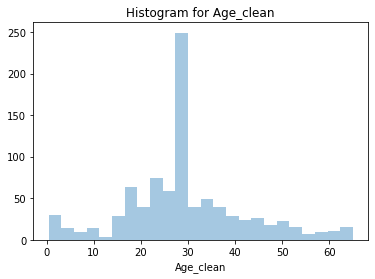

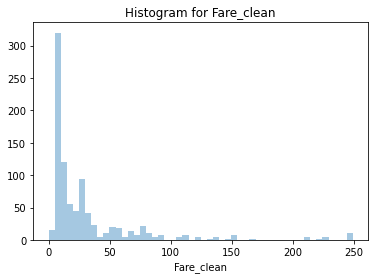

In [48]:
# Plot histogram for each continuous feature to see if a transformation is necessary
for feature in ['Age_clean', 'Fare_clean']:
    sns.distplot(titanic[feature], kde=False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

### Box-Cox Power Transformation

**Base Form** $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |

**Example (Using Fare)**

| Original value    | Transformation           |           Transformation               |
|------|--------------------------|--------------------------|
| $$ 50 $$    | $$ \frac{1}{50^2} $$           |  $$ 0.0004 $$      |
| $$ 50 $$    | $$ \frac{1}{50} $$          | $$ 0.02 $$        |
| $$ 50 $$  | $$ \frac{1}{\sqrt{50}} $$ | $$ 0.14 $$ |
| $$ 50 $$     | $$ log(50) $$              | $$ 1.7 $$             |
| $$ 50 $$   | $$ \sqrt{50} $$ | $$ 7.07 $$           |
| $$ 50 $$     | $$ 50 $$              | $$ 50 $$                  |
| $$ 50 $$     | $$ 50^2 $$           | $$ 2500 $$                |

**Process**

1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

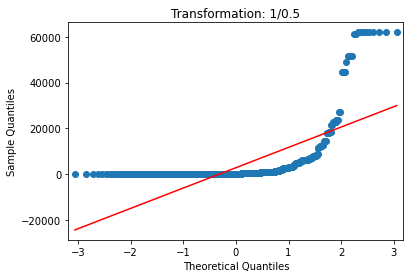

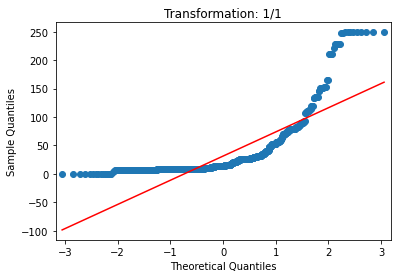

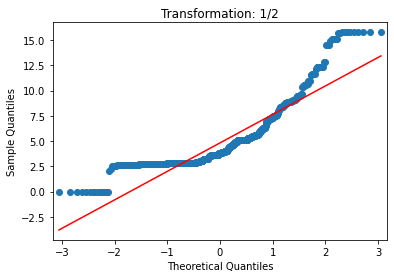

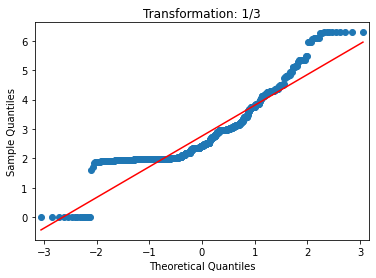

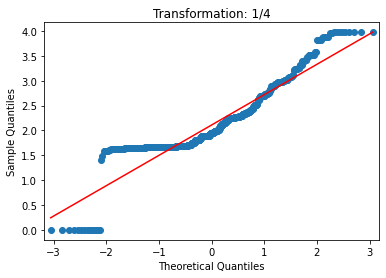

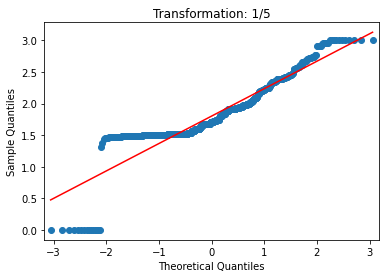

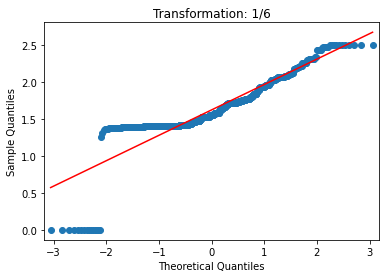

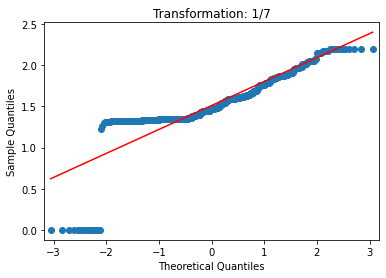

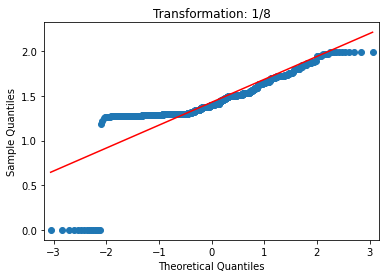

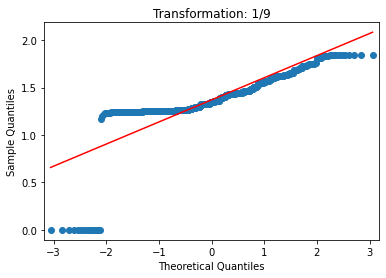

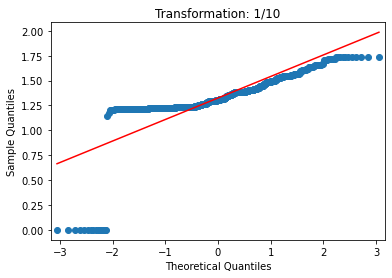

In [49]:
# Generate QQ plots
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = titanic['Fare_clean']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

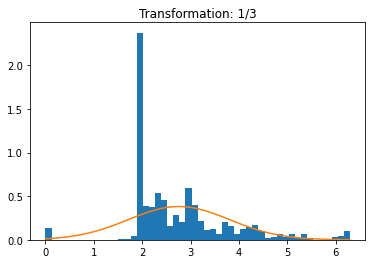

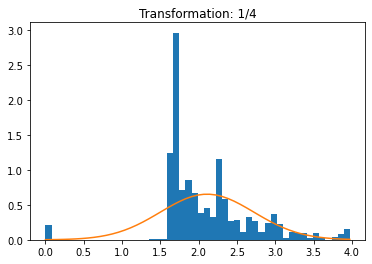

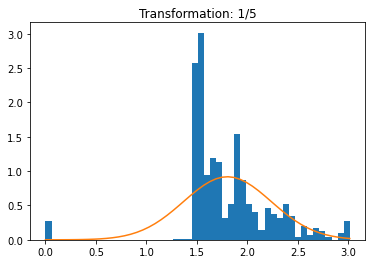

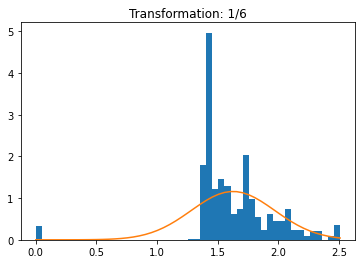

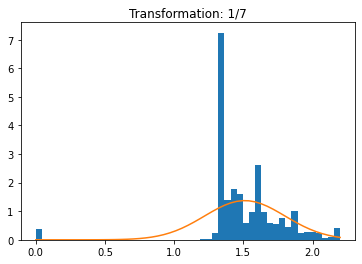

In [50]:
# Box-Cox transformation
for i in [3, 4, 5, 6, 7]:
    data_t = titanic['Fare_clean']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

In [51]:
# Create the new transformed feature
titanic['Fare_clean_tr'] = titanic['Fare_clean'].apply(lambda x: x**(1/5))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606


In [52]:
# Create new CSV with updated data
titanic.to_csv('../../../data/titanic_transformed.csv', index=False)

## Creating And Cleaning Features: Create New Features From Text

### Read In Data

In [53]:
titanic = pd.read_csv('../../../data/titanic_transformed.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606


### Create New Title Feature

In [54]:
# Create a title feature by parsing passenger name
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr


In [55]:
# Look at survival rate by title
print(titanic.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean']))

                       count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000


In [56]:
# Create new CSV with updated data
titanic.to_csv('../../../data/titanic_title.csv', index=False)

## Creating And Cleaning Features: Create Indicator

### Read In Data

In [57]:
titanic = pd.read_csv('../../../data/titanic_title.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr


### Create Indicator Variable For `Cabin`

In [58]:
# What would an indicator variable for Cabin look like?
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [59]:
# Create indicator feature
titanic['Cabin_ind']=np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr,0


In [60]:
# Create new CSV with updated data
titanic.to_csv('../../../data/titanic_cabin_ind.csv', index=False)

## Creating And Cleaning Features: Combine Existing Features Into New Feature

### Read In Data

In [61]:
titanic = pd.read_csv('../../../data/titanic_cabin_ind.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr,0


### Combine `SibSp` & `Parch` Into New `Family_cnt` Feature

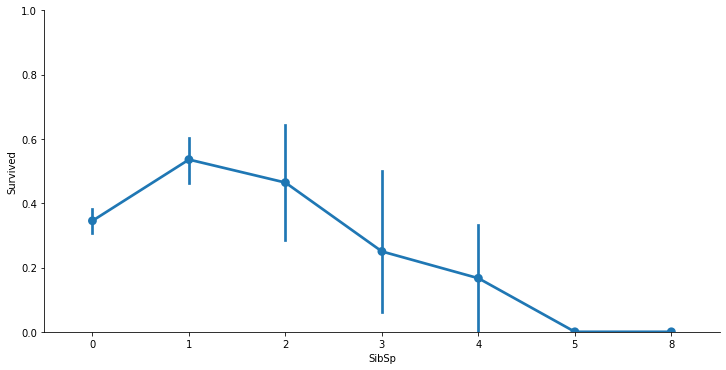

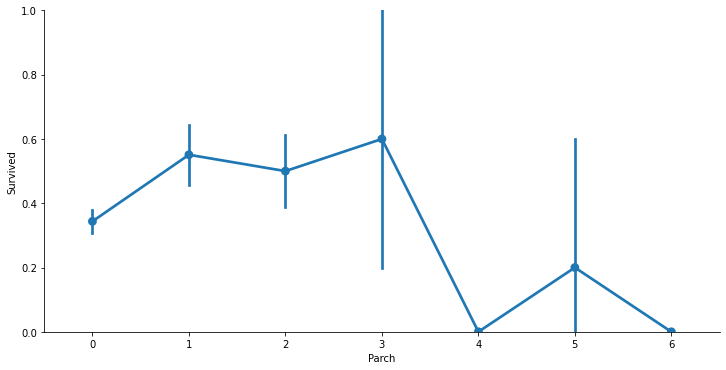

In [62]:
# Generate categorical plots for ordinal features
for col in ['SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )
    plt.ylim(0, 1)

(0.0, 1.0)

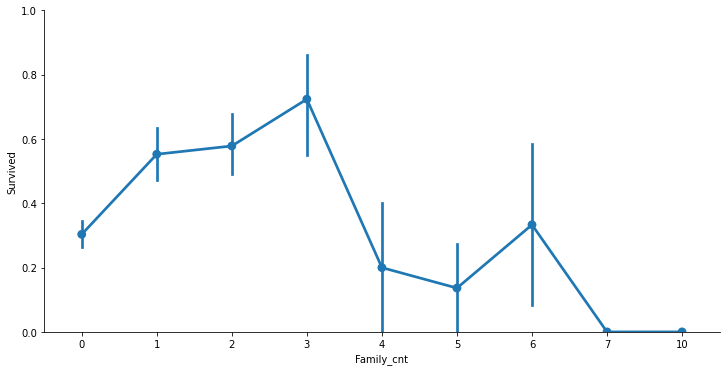

In [63]:
# Create a new family count feature
titanic['Family_cnt'] = titanic['SibSp']+titanic['Parch']
sns.catplot(x='Family_cnt', y='Survived', data=titanic, kind='point', aspect=2, )
plt.ylim(0, 1)

In [64]:
# Create new CSV with updated data
titanic.to_csv('../../../data/titanic_family_cnt.csv', index=False)

## Creating And Cleaning Features: Convert Categorical Features To Numeric

### Read In Data

In [65]:
titanic = pd.read_csv('../../../data/titanic_family_cnt.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr,0,0


### Convert Categorical Features To Numeric

In [66]:
# Convert categorical features to numeric levels
for feature in ['Sex', 'Cabin', 'Embarked', 'Embarked_clean', 'Title']:
    le = LabelEncoder()
    titanic[feature] = le.fit_transform(titanic[feature].astype(str))

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2,22.0,3,7.2500,1.486167,11,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,38.0,1,0,PC 17599,71.2833,81,0,38.0,0,71.2833,2.347457,12,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2,26.0,3,7.9250,1.512864,8,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,35.0,3,53.1000,2.213191,12,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2,35.0,3,8.0500,1.517606,11,0,0


In [67]:
# Create new CSV with updated data
titanic.to_csv('../../../data/titanic_numeric.csv', index=False)

## 3. Prepare Features For Modeling: Create Training And Test Sets

### Read In Data

In [68]:
titanic = pd.read_csv('../../../data/titanic_numeric.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2,22.0,3,7.2500,1.486167,11,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,38.0,1,0,PC 17599,71.2833,81,0,38.0,0,71.2833,2.347457,12,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2,26.0,3,7.9250,1.512864,8,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,35.0,3,53.1000,2.213191,12,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2,35.0,3,8.0500,1.517606,11,0,0


### Split Into Train, Validation, And Test Set

In [69]:
# Drop unnecccessary features and split into training/test sets
features = titanic.drop(['PassengerId', 'Ticket', 'Name', 'Survived'], axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
570,2,1,62.0,0,0,10.5000,147,2,62.0,3,10.5000,1.600434,11,0,0
787,3,1,8.0,4,1,29.1250,147,1,8.0,2,29.1250,1.962697,7,0,5
74,3,1,32.0,0,0,56.4958,147,2,32.0,3,56.4958,2.240801,11,0,0
113,3,0,20.0,1,0,9.8250,147,2,20.0,3,9.8250,1.579307,8,0,1
635,2,0,28.0,0,0,13.0000,147,2,28.0,3,13.0000,1.670278,8,0,0


In [70]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


### Write Out All Data

In [71]:
X_train.to_csv('../../../data/split_data/train_features.csv', index=False)
X_val.to_csv('../../../data/split_data/val_features.csv', index=False)
X_test.to_csv('../../../data/split_data/test_features.csv', index=False)

y_train.to_csv('../../../data/split_data/train_labels.csv', index=False)
y_val.to_csv('../../../data/split_data/val_labels.csv', index=False)
y_test.to_csv('../../../data/split_data/test_labels.csv', index=False)

## Prepare Features For Modeling: Standardize All Features

### Read In Data

In [72]:
titanic_train = pd.read_csv('../../../data/split_data/train_features.csv')
titanic_val = pd.read_csv('../../../data/split_data/val_features.csv')
titanic_test = pd.read_csv('../../../data/split_data/test_features.csv')
titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,2,1,62.0,0,0,10.5000,147,2,62.0,3,10.5000,1.600434,11,0,0
1,3,1,8.0,4,1,29.1250,147,1,8.0,2,29.1250,1.962697,7,0,5
2,3,1,32.0,0,0,56.4958,147,2,32.0,3,56.4958,2.240801,11,0,0
3,3,0,20.0,1,0,9.8250,147,2,20.0,3,9.8250,1.579307,8,0,1
4,2,0,28.0,0,0,13.0000,147,2,28.0,3,13.0000,1.670278,8,0,0


### Standardize Features

In [73]:
# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(titanic_train)

StandardScaler()

In [74]:
# Scale the training, test, and validation sets
features = titanic_train.columns

titanic_train[features] = scaler.transform(titanic_train[features])
titanic_val[features] = scaler.transform(titanic_val[features])
titanic_test[features] = scaler.transform(titanic_test[features])

titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,-0.408652,0.737125,2.258185,-0.464063,-0.468427,-0.412724,0.450064,0.573494,2.570771,0.545364,-0.483840,-0.446199,0.430223,-0.544166,-0.540385
1,0.803682,0.737125,-1.469145,2.692745,0.794906,-0.066661,0.450064,-0.718682,-1.673694,-0.334468,-0.046993,0.373863,-1.784129,-0.544166,2.277639
2,0.803682,0.737125,0.187446,-0.464063,-0.468427,0.441904,0.450064,0.573494,0.212735,0.545364,0.594986,1.003414,0.430223,-0.544166,-0.540385
3,0.803682,-1.356623,-0.640849,0.325139,-0.468427,-0.425266,0.450064,0.573494,-0.730480,0.545364,-0.499672,-0.494025,-1.230541,-0.544166,0.023220
4,-0.408652,-1.356623,-0.088652,-0.464063,-0.468427,-0.366273,0.450064,0.573494,-0.101670,0.545364,-0.425203,-0.288093,-1.230541,-0.544166,-0.540385


## Prepare Features For Modeling: Write Out All Final Datasets

### Read In Data

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class (1st, 2nd, or 3rd)
- **Sex** (str) - Gender of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [75]:
# Read in data
titanic_train = pd.read_csv('../../../data/split_data/train_features.csv')
titanic_val = pd.read_csv('../../../data/split_data/val_features.csv')
titanic_test = pd.read_csv('../../../data/split_data/test_features.csv')
titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,2,1,62.0,0,0,10.5000,147,2,62.0,3,10.5000,1.600434,11,0,0
1,3,1,8.0,4,1,29.1250,147,1,8.0,2,29.1250,1.962697,7,0,5
2,3,1,32.0,0,0,56.4958,147,2,32.0,3,56.4958,2.240801,11,0,0
3,3,0,20.0,1,0,9.8250,147,2,20.0,3,9.8250,1.579307,8,0,1
4,2,0,28.0,0,0,13.0000,147,2,28.0,3,13.0000,1.670278,8,0,0


In [76]:
# Define the list of features to be used for each dataset
raw_original_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare',
                         'Cabin', 'Embarked']

cleaned_original_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare_clean',
                             'Cabin', 'Embarked_clean']

all_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare_clean', 'Fare_clean_tr',
                'Cabin', 'Cabin_ind', 'Embarked_clean', 'Title', 'Family_cnt']

reduced_features = ['Pclass', 'Sex', 'Age_clean', 'Family_cnt', 'Fare_clean_tr',
                    'Cabin_ind', 'Title']

### Write Out All Data

In [77]:
# Write out final data for each feature set
titanic_train[raw_original_features].to_csv('../../../data/final_data/train_features_raw.csv', index=False)
titanic_val[raw_original_features].to_csv('../../../data/final_data/val_features_raw.csv', index=False)
titanic_test[raw_original_features].to_csv('../../../data/final_data/test_features_raw.csv', index=False)

titanic_train[cleaned_original_features].to_csv('../../../data/final_data/train_features_original.csv', index=False)
titanic_val[cleaned_original_features].to_csv('../../../data/final_data/val_features_original.csv', index=False)
titanic_test[cleaned_original_features].to_csv('../../../data/final_data/test_features_original.csv', index=False)

titanic_train[all_features].to_csv('../../../data/final_data/train_features_all.csv', index=False)
titanic_val[all_features].to_csv('../../../data/final_data/val_features_all.csv', index=False)
titanic_test[all_features].to_csv('../../../data/final_data/test_features_all.csv', index=False)

titanic_train[reduced_features].to_csv('../../../data/final_data/train_features_reduced.csv', index=False)
titanic_val[reduced_features].to_csv('../../../data/final_data/val_features_reduced.csv', index=False)
titanic_test[reduced_features].to_csv('../../../data/final_data/test_features_reduced.csv', index=False)

### Move Labels To Proper Directory

In [78]:
# Read in all labels
titanic_train_labels = pd.read_csv('../../../data/split_data/train_labels.csv')
titanic_val_labels = pd.read_csv('../../../data/split_data/val_labels.csv')
titanic_test_labels = pd.read_csv('../../../data/split_data/test_labels.csv')

In [79]:
# Double-check the labels
titanic_train_labels

,Survived
0,1
1,0
2,1
3,0
4,1
...,...
529,1
530,0
531,0
532,1


In [80]:
# Write out labels to final directory
titanic_train_labels.to_csv('../../../data/final_data/train_labels.csv', index=False)
titanic_val_labels.to_csv('../../../data/final_data/val_labels.csv', index=False)
titanic_test_labels.to_csv('../../../data/final_data/test_labels.csv', index=False)

## 4. Build Models To Compare Features: Raw Original Features

### Read In Data

In [81]:
train_features = pd.read_csv('../../../data/final_data/train_features_raw.csv')
train_labels = pd.read_csv('../../../data/final_data/train_labels.csv')

print(train_features.head())

print(train_labels.head())

   Pclass  Sex  Age_clean  SibSp  Parch     Fare  Cabin  Embarked
0       2    1       62.0      0      0  10.5000    147         2
1       3    1        8.0      4      1  29.1250    147         1
2       3    1       32.0      0      0  56.4958    147         2
3       3    0       20.0      1      0   9.8250    147         2
4       2    0       28.0      0      0  13.0000    147         2
   Survived
0         1
1         0
2         1
3         0
4         1


<AxesSubplot:>

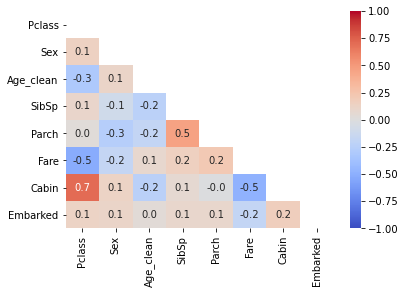

In [82]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

### GridSearchCV

In [83]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [84]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range (3,10)],
    'max_depth': [2,4,8,16,32,None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 512}

0.723 (+/-0.114) for {'max_depth': 2, 'n_estimators': 8}
0.802 (+/-0.071) for {'max_depth': 2, 'n_estimators': 16}
0.785 (+/-0.122) for {'max_depth': 2, 'n_estimators': 32}
0.775 (+/-0.103) for {'max_depth': 2, 'n_estimators': 64}
0.792 (+/-0.111) for {'max_depth': 2, 'n_estimators': 128}
0.792 (+/-0.105) for {'max_depth': 2, 'n_estimators': 256}
0.792 (+/-0.101) for {'max_depth': 2, 'n_estimators': 512}
0.833 (+/-0.066) for {'max_depth': 4, 'n_estimators': 8}
0.815 (+/-0.111) for {'max_depth': 4, 'n_estimators': 16}
0.837 (+/-0.074) for {'max_depth': 4, 'n_estimators': 32}
0.82 (+/-0.114) for {'max_depth': 4, 'n_estimators': 64}
0.818 (+/-0.112) for {'max_depth': 4, 'n_estimators': 128}
0.818 (+/-0.116) for {'max_depth': 4, 'n_estimators': 256}
0.818 (+/-0.111) for {'max_depth': 4, 'n_estimators': 512}
0.822 (+/-0.024) for {'max_depth': 8, 'n_estimators': 8}
0.82 (+/-0.05) for {'max_depth': 8, 'n_estimators': 16}
0.826 (+/-0.064) for

### Feature Importance

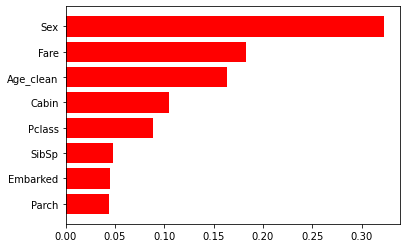

In [85]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### Write Out Pickled Model

In [86]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, '../../../models/mdl_raw_original_features.pkl')

['../../../models/mdl_raw_original_features.pkl']

## Build Models To Compare Features: Cleaned Original Features

### Read In Data

In [87]:
train_features = pd.read_csv('../../../data/final_data/train_features_original.csv')
train_labels = pd.read_csv('../../../data/final_data/train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Cabin,Embarked_clean
0,2,1,62.0,0,0,10.5000,147,3
1,3,1,8.0,4,1,29.1250,147,2
2,3,1,32.0,0,0,56.4958,147,3
3,3,0,20.0,1,0,9.8250,147,3
4,2,0,28.0,0,0,13.0000,147,3


<AxesSubplot:>

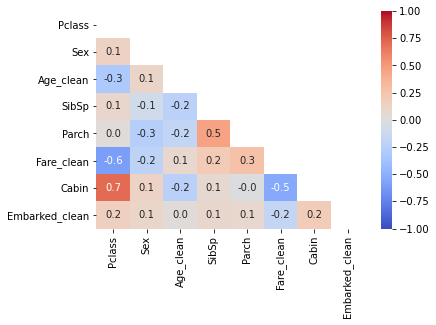

In [88]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

### GridSearchCV

In [89]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [90]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 128}

0.768 (+/-0.121) for {'max_depth': 2, 'n_estimators': 8}
0.783 (+/-0.101) for {'max_depth': 2, 'n_estimators': 16}
0.787 (+/-0.119) for {'max_depth': 2, 'n_estimators': 32}
0.792 (+/-0.119) for {'max_depth': 2, 'n_estimators': 64}
0.798 (+/-0.097) for {'max_depth': 2, 'n_estimators': 128}
0.794 (+/-0.109) for {'max_depth': 2, 'n_estimators': 256}
0.794 (+/-0.113) for {'max_depth': 2, 'n_estimators': 512}
0.79 (+/-0.114) for {'max_depth': 4, 'n_estimators': 8}
0.826 (+/-0.084) for {'max_depth': 4, 'n_estimators': 16}
0.817 (+/-0.115) for {'max_depth': 4, 'n_estimators': 32}
0.818 (+/-0.107) for {'max_depth': 4, 'n_estimators': 64}
0.832 (+/-0.087) for {'max_depth': 4, 'n_estimators': 128}
0.817 (+/-0.113) for {'max_depth': 4, 'n_estimators': 256}
0.818 (+/-0.102) for {'max_depth': 4, 'n_estimators': 512}
0.826 (+/-0.099) for {'max_depth': 8, 'n_estimators': 8}
0.832 (+/-0.065) for {'max_depth': 8, 'n_estimators': 16}
0.839 (+/-0.074) f

### Feature Importance

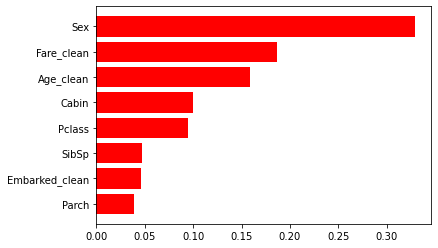

In [91]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### Write Out Pickled Model

In [92]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, '../../../models/mdl_cleaned_original_features.pkl')

['../../../models/mdl_cleaned_original_features.pkl']

## Build Models To Compare Features: All Features

### Read In Data

In [93]:
train_features = pd.read_csv('../../../data/final_data/train_features_all.csv')
train_labels = pd.read_csv('../../../data/final_data/train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Fare_clean_tr,Cabin,Cabin_ind,Embarked_clean,Title,Family_cnt
0,2,1,62.0,0,0,10.5000,1.600434,147,0,3,11,0
1,3,1,8.0,4,1,29.1250,1.962697,147,0,2,7,5
2,3,1,32.0,0,0,56.4958,2.240801,147,0,3,11,0
3,3,0,20.0,1,0,9.8250,1.579307,147,0,3,8,1
4,2,0,28.0,0,0,13.0000,1.670278,147,0,3,8,0


<AxesSubplot:>

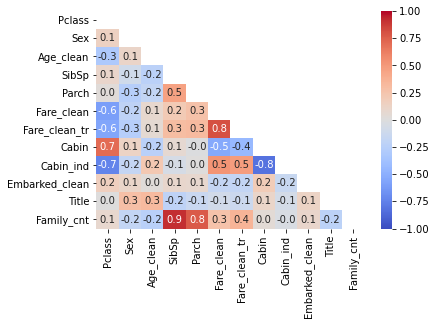

In [94]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

### GridSearchCV

In [95]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [96]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 32}

0.779 (+/-0.114) for {'max_depth': 2, 'n_estimators': 8}
0.781 (+/-0.139) for {'max_depth': 2, 'n_estimators': 16}
0.775 (+/-0.121) for {'max_depth': 2, 'n_estimators': 32}
0.792 (+/-0.122) for {'max_depth': 2, 'n_estimators': 64}
0.781 (+/-0.116) for {'max_depth': 2, 'n_estimators': 128}
0.783 (+/-0.129) for {'max_depth': 2, 'n_estimators': 256}
0.789 (+/-0.118) for {'max_depth': 2, 'n_estimators': 512}
0.802 (+/-0.092) for {'max_depth': 4, 'n_estimators': 8}
0.818 (+/-0.126) for {'max_depth': 4, 'n_estimators': 16}
0.83 (+/-0.08) for {'max_depth': 4, 'n_estimators': 32}
0.83 (+/-0.076) for {'max_depth': 4, 'n_estimators': 64}
0.83 (+/-0.091) for {'max_depth': 4, 'n_estimators': 128}
0.82 (+/-0.097) for {'max_depth': 4, 'n_estimators': 256}
0.824 (+/-0.082) for {'max_depth': 4, 'n_estimators': 512}
0.826 (+/-0.077) for {'max_depth': 8, 'n_estimators': 8}
0.826 (+/-0.074) for {'max_depth': 8, 'n_estimators': 16}
0.828 (+/-0.049) for {'

### Feature Importance

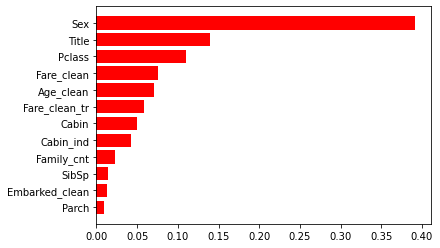

In [97]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### Write Out Pickled Model

In [98]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, '../../../models/mdl_all_features.pkl')

['../../../models/mdl_all_features.pkl']

## Build Models To Compare Features: Reduced Set Of Features

### Read In Data

In [99]:
train_features = pd.read_csv('../../../data/final_data/train_features_reduced.csv')
train_labels = pd.read_csv('../../../data/final_data/train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,Family_cnt,Fare_clean_tr,Cabin_ind,Title
0,2,1,62.0,0,1.600434,0,11
1,3,1,8.0,5,1.962697,0,7
2,3,1,32.0,0,2.240801,0,11
3,3,0,20.0,1,1.579307,0,8
4,2,0,28.0,0,1.670278,0,8


<AxesSubplot:>

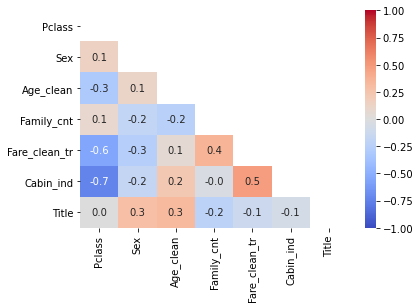

In [100]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

### GridSearchCV

In [101]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [102]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 128}

0.783 (+/-0.107) for {'max_depth': 2, 'n_estimators': 8}
0.796 (+/-0.107) for {'max_depth': 2, 'n_estimators': 16}
0.807 (+/-0.107) for {'max_depth': 2, 'n_estimators': 32}
0.79 (+/-0.109) for {'max_depth': 2, 'n_estimators': 64}
0.785 (+/-0.115) for {'max_depth': 2, 'n_estimators': 128}
0.785 (+/-0.125) for {'max_depth': 2, 'n_estimators': 256}
0.789 (+/-0.114) for {'max_depth': 2, 'n_estimators': 512}
0.813 (+/-0.105) for {'max_depth': 4, 'n_estimators': 8}
0.82 (+/-0.083) for {'max_depth': 4, 'n_estimators': 16}
0.815 (+/-0.097) for {'max_depth': 4, 'n_estimators': 32}
0.82 (+/-0.101) for {'max_depth': 4, 'n_estimators': 64}
0.82 (+/-0.113) for {'max_depth': 4, 'n_estimators': 128}
0.813 (+/-0.114) for {'max_depth': 4, 'n_estimators': 256}
0.817 (+/-0.104) for {'max_depth': 4, 'n_estimators': 512}
0.807 (+/-0.079) for {'max_depth': 8, 'n_estimators': 8}
0.811 (+/-0.074) for {'max_depth': 8, 'n_estimators': 16}
0.815 (+/-0.07) for {

### Feature Importance

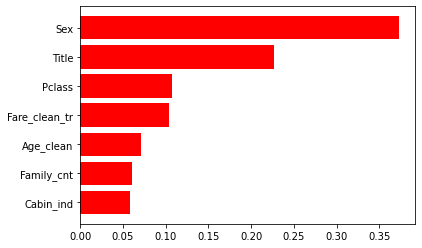

In [103]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### Write Out Pickled Model

In [104]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, '../../../models/mdl_reduced_features.pkl')

['../../../models/mdl_reduced_features.pkl']

## Build Models To Compare Features: Compare And Evaluate All Models

In this section, we will do the following:
1. Evaluate all of our saved models on the validation set
2. Select the best model based on performance on the validation set
3. Evaluate that model on the holdout test set

### Read In Data

In [105]:
val_features_raw = pd.read_csv('../../../data/final_data/val_features_raw.csv')
val_features_original = pd.read_csv('../../../data/final_data/val_features_original.csv')
val_features_all = pd.read_csv('../../../data/final_data/val_features_all.csv')
val_features_reduced = pd.read_csv('../../../data/final_data/val_features_reduced.csv')

val_labels = pd.read_csv('../../../data/final_data/val_labels.csv')

val_features_raw.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,29.699118,1,0,89.1042,86,0
1,1,1,45.500000,0,0,28.5000,56,2
2,3,1,29.699118,0,0,7.7500,147,1
3,2,0,24.000000,1,0,26.0000,147,2
4,2,1,36.000000,0,0,12.8750,90,0


### Read In Models

In [106]:
# Read in models
models = {}

for mdl in ['raw_original', 'cleaned_original', 'all', 'reduced']:
    models[mdl] = joblib.load('../../../models/mdl_{}_features.pkl'.format(mdl))

### Evaluate Models On The Validation Set

In [107]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

In [108]:
# Evaluate all of our models on the validation set
evaluate_model('Raw Features', models['raw_original'], val_features_raw, val_labels)
evaluate_model('Cleaned Features', models['cleaned_original'], val_features_original, val_labels)
evaluate_model('All Features', models['all'], val_features_all, val_labels)
evaluate_model('Reduced Features', models['reduced'], val_features_reduced, val_labels)

Raw Features -- 	Accuracy: 0.809 / Precision: 0.792 / Recall: 0.646 / Latency: 64.0ms
Cleaned Features -- 	Accuracy: 0.803 / Precision: 0.778 / Recall: 0.646 / Latency: 7.7ms
All Features -- 	Accuracy: 0.815 / Precision: 0.786 / Recall: 0.677 / Latency: 3.9ms
Reduced Features -- 	Accuracy: 0.82 / Precision: 0.8 / Recall: 0.677 / Latency: 6.4ms


### Evaluate Best Model On Test Set

In [109]:
# Read in our test features
test_features = pd.read_csv('../../../data/final_data/test_features_all.csv')
test_labels = pd.read_csv('../../../data/final_data/test_labels.csv')

In [110]:
# Evaluate our final model on the test set
evaluate_model('All Features', models['all'], test_features, test_labels)

All Features -- 	Accuracy: 0.799 / Precision: 0.812 / Recall: 0.684 / Latency: 7.1ms
